In [1]:
import os
from pathlib import Path
import anndata as an
import numpy as np
import pandas as pd
import deside
import matplotlib.pyplot as plt
import seaborn as sns
from deside.utility import check_dir, set_fig_style, print_df, get_ccc, non_log2log_cpm, non_log2cpm
from deside.decon_cf import DeSide
from deside.utility.read_file import read_gene_set, ReadH5AD
set_fig_style(font_family='Arial', font_size=8)

2024-06-14 17:24:16.364957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## DeSide (sigmoid)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset pdac_peng_02 (DiNonCancer+PDAC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset hnscc_puram_03 (DiNonCancer+HNSCC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset luad_kim_05 (DiNonCancer+LUAD)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset prad_chang_08 (DiNonCancer+PRAD)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset hcc_sun_10 (DiNonCancer+HCC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset gbm_abdelfattah_12 (DiNonCancer+GBM)
<!-- - Ascites -->

In [2]:
cancer_type = 'pdac'
ccc_deside_pdac = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_sigmoid/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_pdac.index.name = 'cancer_type'
ccc_deside_pdac['model'] = f'Sigmoid_{cancer_type.upper()}'
ccc_deside_pdac.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.689301,0.235861,0.209305,Sigmoid_PDAC
BLCA,0.674780,0.113342,0.671796,Sigmoid_PDAC


In [3]:
cancer_type = 'hnscc'
ccc_deside_hnscc = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_sigmoid/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_hnscc.index.name = 'cancer_type'
ccc_deside_hnscc['model'] = f'Sigmoid_{cancer_type.upper()}'
ccc_deside_hnscc.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.813324,0.195484,0.346087,Sigmoid_HNSCC
BLCA,0.693393,0.129378,0.645159,Sigmoid_HNSCC


In [4]:
ccc_deside_luad = pd.read_csv('../results/whole_workflow_20240519_11ds_only_luad_cancer_cells/DeSide_01_new_ds_subtypes_all_range_sigmoid_pathway/Mixed_N100K_segment_without_filtering_luad/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_luad.index.name = 'cancer_type'
ccc_deside_luad['model'] = 'Sigmoid_LUAD'
ccc_deside_luad.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.743575,0.15257,0.465105,Sigmoid_LUAD
BLCA,0.719596,0.11015,0.714279,Sigmoid_LUAD


In [5]:
cancer_type = 'prad'
ccc_deside_prad = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_sigmoid/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_prad.index.name = 'cancer_type'
ccc_deside_prad['model'] = f'Sigmoid_{cancer_type.upper()}'
ccc_deside_prad.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.828446,0.219156,0.334048,Sigmoid_PRAD
BLCA,0.693792,0.136107,0.636962,Sigmoid_PRAD


In [6]:
cancer_type = 'hcc'
ccc_deside_hcc = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_sigmoid/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_hcc.index.name = 'cancer_type'
ccc_deside_hcc['model'] = f'Sigmoid_{cancer_type.upper()}'
ccc_deside_hcc.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.823895,0.170637,0.373646,Sigmoid_HCC
BLCA,0.696461,0.184886,0.477249,Sigmoid_HCC


In [7]:
cancer_type = 'gbm'
ccc_deside_gbm = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_sigmoid/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_gbm.index.name = 'cancer_type'
ccc_deside_gbm['model'] = f'Sigmoid_{cancer_type.upper()}'
ccc_deside_gbm.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.859805,0.146871,0.481719,Sigmoid_GBM
BLCA,0.712604,0.147350,0.588270,Sigmoid_GBM


## DeSide (softmax)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset pdac_peng_02 (DiNonCancer+PDAC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset hnscc_puram_03 (DiNonCancer+HNSCC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset luad_kim_05 (DiNonCancer+LUAD)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset prad_chang_08 (DiNonCancer+PRAD)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset hcc_sun_10 (DiNonCancer+HCC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset gbm_abdelfattah_12 (DiNonCancer+GBM)
- Ascites

In [9]:
cancer_type = 'pdac'
ll_ac = 'softmax'
ccc_deside_softmax_pdac = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_{ll_ac}/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_softmax_pdac.index.name = 'cancer_type'
ccc_deside_softmax_pdac['model'] = f'Softmax_{cancer_type.upper()}'
ccc_deside_softmax_pdac.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.574998,0.611324,0.047586,Softmax_PDAC
BLCA,0.656193,0.199162,0.464784,Softmax_PDAC


In [10]:
cancer_type = 'hnscc'
ll_ac = 'softmax'
ccc_deside_softmax_hnscc = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_{ll_ac}/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_softmax_hnscc.index.name = 'cancer_type'
ccc_deside_softmax_hnscc['model'] = f'Softmax_{cancer_type.upper()}'
ccc_deside_softmax_hnscc.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.739512,0.679322,0.022499,Softmax_HNSCC
BLCA,0.411633,0.359683,0.123720,Softmax_HNSCC


In [11]:
ccc_deside_softmax_luad = pd.read_csv('../results/whole_workflow_20240519_11ds_only_luad_cancer_cells/DeSide_02_new_ds_subtypes_all_range_softmax_pathway/Mixed_N100K_segment_without_filtering_luad/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_softmax_luad.index.name = 'cancer_type'
ccc_deside_softmax_luad['model'] = 'Softmax_LUAD'
ccc_deside_softmax_luad.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.456172,0.708236,0.028878,Softmax_LUAD
BLCA,0.695276,0.207696,0.503561,Softmax_LUAD


In [12]:
cancer_type = 'prad'
ll_ac = 'softmax'
ccc_deside_softmax_prad = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_{ll_ac}/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_softmax_prad.index.name = 'cancer_type'
ccc_deside_softmax_prad['model'] = f'Softmax_{cancer_type.upper()}'
ccc_deside_softmax_prad.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.402848,0.836505,0.007079,Softmax_PRAD
BLCA,0.682007,0.288769,0.313589,Softmax_PRAD


In [13]:
cancer_type = 'hcc'
ll_ac = 'softmax'
ccc_deside_softmax_hcc = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_{ll_ac}/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_softmax_hcc.index.name = 'cancer_type'
ccc_deside_softmax_hcc['model'] = f'Softmax_{cancer_type.upper()}'
ccc_deside_softmax_hcc.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.609314,0.607930,0.029144,Softmax_HCC
BLCA,0.504000,0.566042,0.038275,Softmax_HCC


In [14]:
cancer_type = 'gbm'
ll_ac = 'softmax'
ccc_deside_softmax_gbm = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_{ll_ac}/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_softmax_gbm.index.name = 'cancer_type'
ccc_deside_softmax_gbm['model'] = f'Softmax_{cancer_type.upper()}'
ccc_deside_softmax_gbm.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.642933,0.596318,0.057157,Softmax_GBM
BLCA,0.446472,0.636920,0.035718,Softmax_GBM


## Comparison

In [15]:
ccc_all = pd.concat([ccc_deside_pdac, ccc_deside_softmax_pdac, ccc_deside_hnscc, ccc_deside_softmax_hnscc,
                     ccc_deside_luad, ccc_deside_softmax_luad, ccc_deside_prad, ccc_deside_softmax_prad,
                     ccc_deside_hcc, ccc_deside_softmax_hcc, ccc_deside_gbm, ccc_deside_softmax_gbm])
ccc_all.reset_index(inplace=True)
ccc_all.sort_values(by='ccc', ascending=False, inplace=True)
print(ccc_all.shape)
ccc_all.head(2)

(216, 5)


,cancer_type,corr,rmse,ccc,model
49,LUSC,0.781959,0.096118,0.778250,Sigmoid_HNSCC
79,KICH,0.873632,0.082134,0.744428,Sigmoid_LUAD


In [16]:
ccc_all['model'].unique()

array(['Sigmoid_HNSCC', 'Sigmoid_LUAD', 'Sigmoid_PRAD', 'Sigmoid_PDAC',
       'Softmax_LUAD', 'Sigmoid_GBM', 'Softmax_HCC', 'Sigmoid_HCC',
       'Softmax_PDAC', 'Softmax_HNSCC', 'Softmax_PRAD', 'Softmax_GBM'],
      dtype=object)

In [17]:
color_2 = [sns.color_palette("tab20")[i] for i in range(2)]
sns.color_palette(color_2)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274)]

In [18]:
fig_dir = './results/reviewer2_q2/'
check_dir(fig_dir)
cancer_types = ccc_all['cancer_type'].unique()

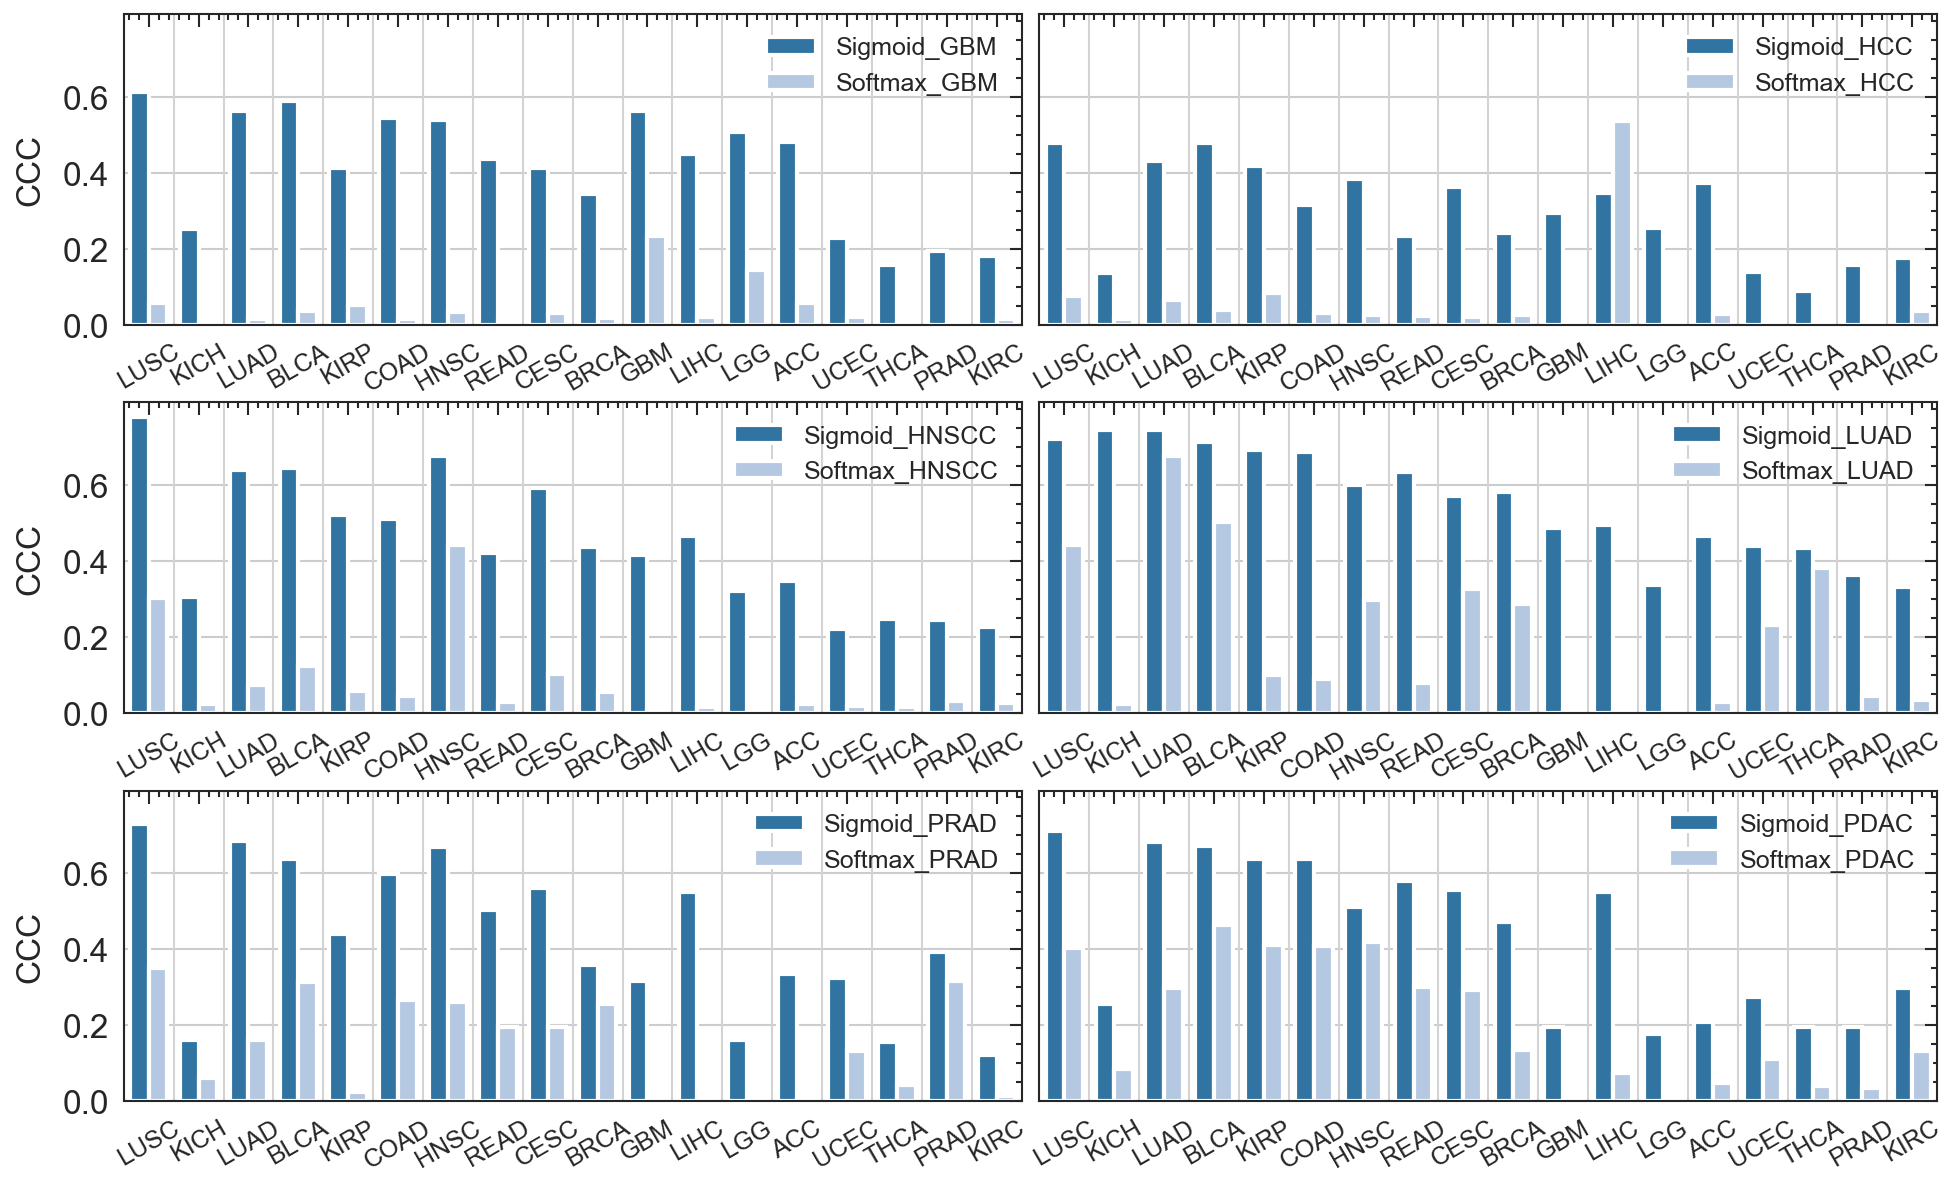

In [19]:
fig, axes = plt.subplots(figsize=(7.8, 4.8), nrows=3, ncols=2, sharey=True)
plt.subplots_adjust(# left=0.1, bottom=0.1,  right=0.9,  top=0.9, 
                    wspace=0.02, 
                    hspace=0.25)
width = 0.75
m1 = ['Sigmoid_GBM', 'Softmax_GBM']
g1 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m1), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[0, 0], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m1)
g1.legend(fontsize=6)
# g1.legend([],[], frameon=False)
# sns.move_legend(g1, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[0, 0].grid(axis='y')
for _x in range(18):
    axes[0, 0].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g1.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[0, 0].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('CCC')

m2 = ['Sigmoid_HCC', 'Softmax_HCC']
g2 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m2), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[0, 1], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m2)
g2.legend(fontsize=6)
# g2.legend([],[], frameon=False)
# sns.move_legend(g2, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[0, 1].grid(axis='y')
for _x in range(18):
    axes[0, 1].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g2.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[0, 1].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

m3 = ['Sigmoid_HNSCC', 'Softmax_HNSCC']
g3 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m3), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[1, 0], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m3)
g3.legend(fontsize=6)
# g1.legend([],[], frameon=False)
# sns.move_legend(g1, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[1, 0].grid(axis='y')
for _x in range(18):
    axes[1, 0].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g3.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[1, 0].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('CCC')

m4 = ['Sigmoid_LUAD', 'Softmax_LUAD']
g4 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m4), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[1, 1], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m4)
g4.legend(fontsize=6)
# g2.legend([],[], frameon=False)
# sns.move_legend(g2, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[1, 1].grid(axis='y')
for _x in range(18):
    axes[1, 1].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g4.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[1, 1].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')


m5 = ['Sigmoid_PRAD', 'Softmax_PRAD']
g5 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m5), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[2, 0], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m5)
g5.legend(fontsize=6)
# g1.legend([],[], frameon=False)
# sns.move_legend(g1, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[2, 0].grid(axis='y')
for _x in range(18):
    axes[2, 0].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g5.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[2, 0].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('CCC')

m6 = ['Sigmoid_PDAC', 'Softmax_PDAC']
g6 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m6), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[2, 1], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m6)
g6.legend(fontsize=6)
# g2.legend([],[], frameon=False)
# sns.move_legend(g2, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[2, 1].grid(axis='y')
for _x in range(18):
    axes[2, 1].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g6.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[2, 1].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylabel('')


plt.savefig(os.path.join(fig_dir, 'ccc_value_comparison_across_diff_2algo_6ds_sep.svg'), dpi=300)